In [1]:
import csv 
import matplotlib.pyplot as plt 
import altair 
import pandas as pd

data = pd.read_csv('/Users/deekshitamadhalam/Downloads/updated_dataset.csv')
data

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,B67
1,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,SIM33C
2,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,B8
3,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,BM4
4,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,Q46
...,...,...,...,...,...,...,...,...
193757,Subways,Complaint,Station /Bus Stop /Facility /Structure,Track / Right-of-Way,Track / Right-of-Way,2014,1,No Value
193758,Subways,Complaint,Station /Bus Stop /Facility /Structure,Ticket Machines,Not Working / Out of Service,2014,1,No Value
193759,Subways,Complaint,Station /Bus Stop /Facility /Structure,Station - General,Litter / Garbage / Debris,2014,1,No Value
193760,Subways,Complaint,Station /Bus Stop /Facility /Structure,Staircase,Snow / Ice,2014,1,No Value


In [4]:
import plotly.express as px

In [18]:
year = {}
for value in data['Year']:
    if value in year:
        year[value] += 1 
    else:
        year[value] = 1

print(year)    

{2019: 37029, 2018: 36726, 2017: 34881, 2016: 35936, 2015: 33130, 2014: 16060}


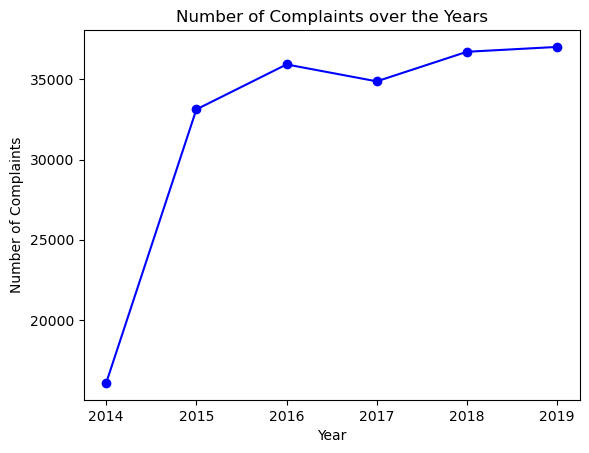

In [22]:
years = list(year.keys())
values = list(year.values())

plt.plot(years, values, marker='o', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints over the Years')
plt.show()

In [18]:
df_complaints = data[data['Commendation or Complaint'] == 'Complaint']
subject_matter_complaints = df_complaints.groupby(['Year', 'Issue Detail']).size().unstack(fill_value=0)

new_subject_matter_complaints = subject_matter_complaints[subject_matter_complaints > 500]


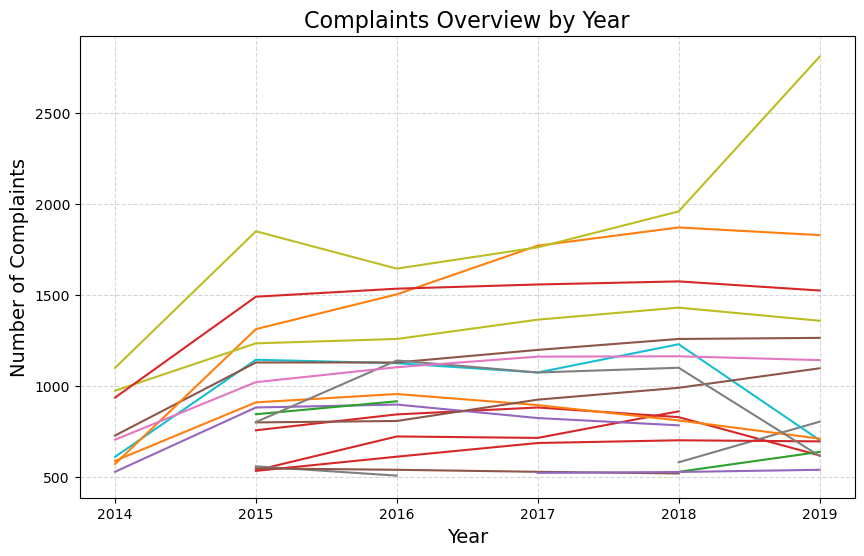

In [36]:
plt.figure(figsize=(10, 6))

# Plot lines for each Subject Matter
for column in new_subject_matter_complaints.columns:
    plt.plot(new_subject_matter_complaints.index, new_subject_matter_complaints[column], label=column)


plt.title("Complaints Overview by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Complaints", fontsize=14)
plt.grid(alpha=0.5, linestyle='--')

#add legends 

plt.show()